In [3]:
import numpy as np
ANGLES = np.linspace(0, 2 * np.pi, 20)
print(ANGLES)

[  0.          18.94736842  37.89473684  56.84210526  75.78947368
  94.73684211 113.68421053 132.63157895 151.57894737 170.52631579
 189.47368421 208.42105263 227.36842105 246.31578947 265.26315789
 284.21052632 303.15789474 322.10526316 341.05263158 360.        ]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

class DummyEnv:
    def __init__(self, collision_data):
        self._collision_data = collision_data

    def get_all_followers_collision_data(self):
        """
        衝突情報（distance, azimuth[rad]）のリストを返す
        """
        return self._collision_data

    def get_drivability_vfh_based(self, th: np.float32, bin_size_deg=10) -> np.ndarray:
        """
        VFHにより走行可能方向を取得
        """
        collision_data = self.get_all_followers_collision_data()
        num_bins = int(360 // bin_size_deg)
        histogram = np.zeros(num_bins, dtype=np.float32)

        for distance, azimuth_rad in collision_data:
            azimuth_deg = np.rad2deg(azimuth_rad) % 360
            bin_index = int(azimuth_deg // bin_size_deg)
            histogram[bin_index] += 1.0 / (distance + 1e-3)

        drivability = histogram < th
        return drivability

    def visualize_drivability(self, drivability, bin_size_deg=10):
        angles = np.arange(0, 360, bin_size_deg)
        plt.figure(figsize=(6, 6))
        plt.polar(np.deg2rad(angles), drivability.astype(int), marker='o')
        plt.title("Drivable Directions (1 = OK)")
        plt.show()

走行可能方向（True=安全）: [ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


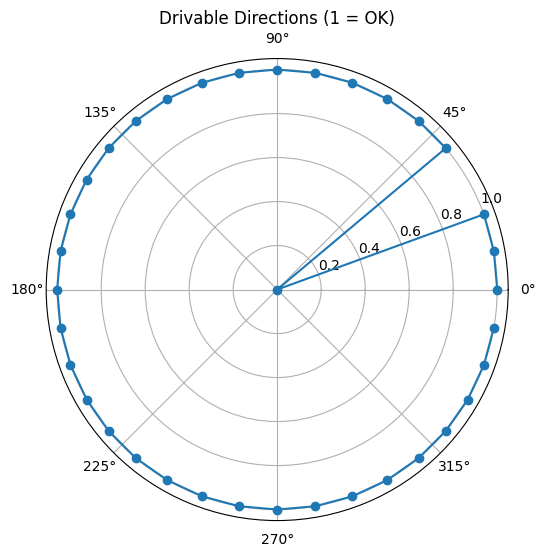

In [5]:
# サンプル：10個の衝突情報（近くの障害物は密度高くなる）
sample_data = [
    (0.5, np.deg2rad(30)),
    (1.0, np.deg2rad(35)),
    (0.3, np.deg2rad(33)),
    (2.0, np.deg2rad(110)),
    (3.0, np.deg2rad(115)),
    (0.6, np.deg2rad(200)),
    (0.9, np.deg2rad(205)),
    (1.5, np.deg2rad(330)),
    (0.7, np.deg2rad(335)),
    (0.8, np.deg2rad(340)),
]

# インスタンス作成
env = DummyEnv(sample_data)

# ドライバビリティ計算（しきい値は調整可）
th = 3.0
drivability = env.get_drivability_vfh_based(th, bin_size_deg=10)

# 結果表示
print("走行可能方向（True=安全）:", drivability)
env.visualize_drivability(drivability)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class DummyEnv:
    def __init__(self, collision_data):
        self._collision_data = collision_data

    def get_all_followers_collision_data(self):
        return self._collision_data

    def get_histogram_vfh(self, bin_size_deg=10) -> np.ndarray:
        """
        VFH用の角度ヒストグラムを計算（障害物密度）
        """
        collision_data = self.get_all_followers_collision_data()
        num_bins = int(360 // bin_size_deg)
        histogram = np.zeros(num_bins, dtype=np.float32)

        for distance, azimuth_rad in collision_data:
            azimuth_deg = np.rad2deg(azimuth_rad) % 360
            bin_index = int(azimuth_deg // bin_size_deg)
            histogram[bin_index] += 1.0 / (distance + 1e-3)

        return histogram

    def plot_polar_histogram(self, histogram, bin_size_deg=10, threshold=None):
        """
        障害物密度のポーラヒストグラム（極座標）を描画
        - threshold: float型のしきい値を指定すると、線を描画
        """
        angles_deg = np.arange(0, 360, bin_size_deg)
        angles_rad = np.deg2rad(angles_deg)

        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, polar=True)
        ax.set_theta_zero_location("N")  # 北を上に
        ax.set_theta_direction(-1)       # 時計回り

        bars = ax.bar(angles_rad, histogram, width=np.deg2rad(bin_size_deg), bottom=0.0, alpha=0.7)

        if threshold is not None:
            # 閾値ライン（円）を描画
            ax.plot(np.linspace(0, 2 * np.pi, 360), [threshold] * 360, 'r--', label=f"Threshold = {threshold}")
            ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))

        ax.set_title("Polar Obstacle Density Histogram")
        plt.show()

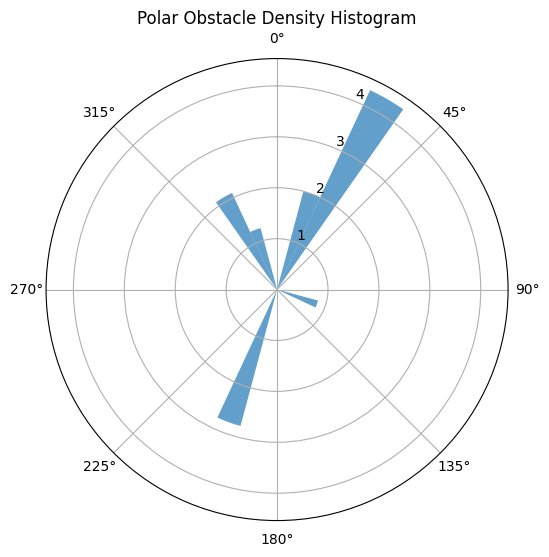

In [9]:
# サンプルデータ
sample_data = [
    (0.5, np.deg2rad(30)),
    (1.0, np.deg2rad(35)),
    (0.3, np.deg2rad(33)),
    (2.0, np.deg2rad(110)),
    (3.0, np.deg2rad(115)),
    (0.6, np.deg2rad(200)),
    (0.9, np.deg2rad(205)),
    (1.5, np.deg2rad(330)),
    (0.7, np.deg2rad(335)),
    (0.8, np.deg2rad(340)),
]

env = DummyEnv(sample_data)
hist = env.get_histogram_vfh(bin_size_deg=10)
env.plot_polar_histogram(hist)

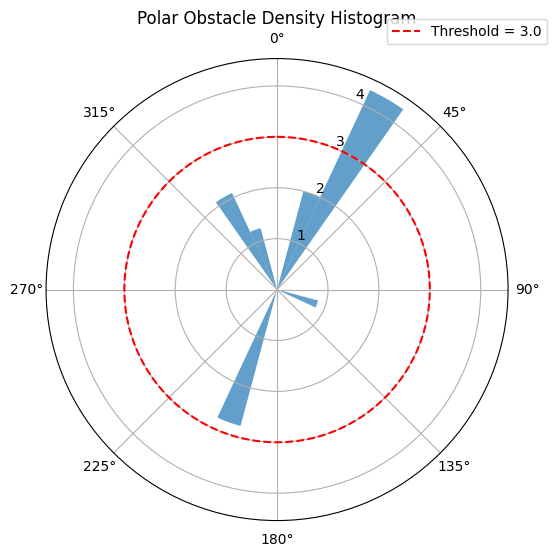

In [10]:
threshold = 3.0
hist = env.get_histogram_vfh(bin_size_deg=10)
env.plot_polar_histogram(hist, bin_size_deg=10, threshold=threshold)